In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
train_data_dir = '/gdrive/My Drive/dataset/train'
validation_data_dir = '/gdrive/My Drive/dataset/val'

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
 train_data_dir,
 target_size=(200, 200),
 batch_size=32,
 class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
 validation_data_dir,
 target_size=(200, 200),
 batch_size=32,
 class_mode='categorical')


Found 13125 images belonging to 8 classes.
Found 558 images belonging to 8 classes.


In [6]:
model = Sequential([
    Input(shape=(200,200,3)),
    Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1)),
    Conv2D(16, kernel_size=(3,3), activation='relu', strides=(1, 1)),
    BatchNormalization(),
    ZeroPadding2D(padding=(1, 1)),

    Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),

    Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid'),
    Conv2D(64, kernel_size=(3,3), activation='relu',strides=(1, 1), padding='valid'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    ZeroPadding2D(padding=(1, 1)),

    Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.01)),
    Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid'),
    BatchNormalization(),

    Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid', kernel_regularizer=regularizers.l2(0.05)),
    Conv2D(128, kernel_size=(2,2), activation='relu', strides=(1, 1), padding='valid'),
    BatchNormalization(),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(8, activation='sigmoid')
])

opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=opt, 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 16)      2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 196, 196, 16)      64        
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 32)      4640      
_________________________________________________________________
conv2d_3 (Con

In [0]:
total_train = 13125
total_val = 558
epochs = 10
batch_size = 500
esc = EarlyStopping(monitor='val_acc', patience=2)

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("/gdrive/My Drive/best_model.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', save_freq=1)

In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_val // batch_size,
    callbacks=[checkpoint, esc]
)


Epoch 1/10

Epoch 00001: loss improved from inf to 8.92744, saving model to /gdrive/My Drive/best_model.h5
 1/26 [>.............................] - ETA: 27:10 - loss: 8.9274 - acc: 0.4102
Epoch 00001: loss did not improve from 8.92744
 2/26 [=>............................] - ETA: 20:35 - loss: 9.9920 - acc: 0.4609
Epoch 00001: loss did not improve from 8.92744
 3/26 [==>...........................] - ETA: 17:42 - loss: 9.8570 - acc: 0.4701
Epoch 00001: loss did not improve from 8.92744
 4/26 [===>..........................] - ETA: 15:55 - loss: 9.6794 - acc: 0.5010
Epoch 00001: loss did not improve from 8.92744
 5/26 [====>.........................] - ETA: 14:42 - loss: 9.6295 - acc: 0.5359
Epoch 00001: loss improved from 8.92744 to 8.66487, saving model to /gdrive/My Drive/best_model.h5
 6/26 [=====>........................] - ETA: 13:45 - loss: 9.4687 - acc: 0.5729
Epoch 00001: loss improved from 8.66487 to 8.39715, saving model to /gdrive/My Drive/best_model.h5
 7/26 [=======>......

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(6)

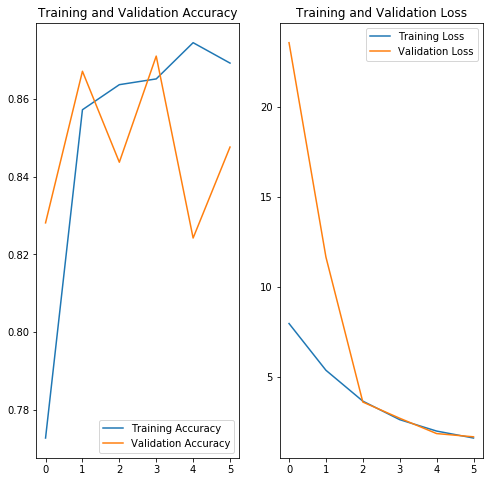

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
save_dir = "/gdrive/My Drive"
json_file = open(save_dir+"/CNN_EmoticonClassification.json", "w")
model_json = model.to_json()
json_file.write(model_json)
json_file.close()
model.save_weights(save_dir+"/CNN_EmoticonClassification_weights.h5")